Installing the necessary libraries


In [1]:
# Пример установки (может потребовать подбора версий!)
!pip install torch torch-geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-$(pip show torch | awk '/^Version:/ {sub(/[^0-9]*$/,"",$2); print $2}').html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00


In [2]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html


In [14]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Define GCN class
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Load model and data
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load model
try:
    model = torch.load("simple_gcn_model.pth", map_location=device, weights_only=False)
    print(" Model loaded successfully")
    print(f"Model type: {type(model)}")

    # Print model information
    print("Model information:")
    for name, param in model.named_parameters():
        print(f"   - {name}: {param.shape}")

except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Load data
try:
    data = torch.load("digital_inequality_graph.pt", map_location=device, weights_only=False)
    print("Graph data loaded successfully")
    print(f"   - Features: {data.x.shape}")
    print(f"   - Edges: {data.edge_index.shape}")

    # Check available attributes
    print("🔍 Available attributes in data:")
    for attr in dir(data):
        if not attr.startswith('_'):
            value = getattr(data, attr)
            if value is not None:
                if hasattr(value, 'shape'):
                    print(f"   - {attr}: {value.shape}")
                else:
                    print(f"   - {attr}: {type(value)}")

except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Load original dataset for feature names
try:
    df = pd.read_csv("cleaned_final_dataset.csv")
    print("Dataset loaded successfully")
    indicators = df["Indicator"].unique()
    print(f"Total unique indicators: {len(indicators)}")

    # Print first 10 indicators for verification
    print("Example indicators:")
    for i, indicator in enumerate(indicators[:10]):
        print(f"   {i+1}. {indicator}")

except Exception as e:
    print(f"Error loading CSV: {e}")
    indicators = np.array([f"Feature_{i}" for i in range(data.x.shape[1])])

# Check dimension compatibility
if len(indicators) != data.x.shape[1]:
    print(f" Warning: Number of indicators ({len(indicators)}) doesn't match feature dimension ({data.x.shape[1]})")
    print(" Creating extended list of indicators...")

    if len(indicators) < data.x.shape[1]:
        extended_indicators = list(indicators)
        for i in range(len(indicators), data.x.shape[1]):
            extended_indicators.append(f"Additional_Feature_{i}")
        indicators = np.array(extended_indicators)
    else:
        indicators = indicators[:data.x.shape[1]]

    print(f" Created {len(indicators)} indicators")

print("\n" + "="*50)
print("ALL COMPONENTS SUCCESSFULLY LOADED")
print("="*50)
print("Summary:")
print(f"   - Model: {type(model).__name__}")
print(f"   - Features: {data.x.shape}")
print(f"   - Edges: {data.edge_index.shape}")
print(f"   - Indicators: {len(indicators)}")
print(f"   - Device: {device}")

# Ensure model is in evaluation mode
model.eval()
print("Model set to evaluation mode")

print("\nReady to perform analysis!")

Using device: cpu
 Model loaded successfully
Model type: <class '__main__.GCN'>
Model information:
   - conv1.bias: torch.Size([64])
   - conv1.lin.weight: torch.Size([64, 123])
   - conv2.bias: torch.Size([3])
   - conv2.lin.weight: torch.Size([3, 64])
Graph data loaded successfully
   - Features: torch.Size([734, 123])
   - Edges: torch.Size([2, 14680])
🔍 Available attributes in data:
   - apply: <class 'method'>
   - apply_: <class 'method'>
   - clone: <class 'method'>
   - coalesce: <class 'method'>
   - concat: <class 'method'>
   - connected_components: <class 'method'>
   - contains_isolated_nodes: <class 'method'>
   - contains_self_loops: <class 'method'>
   - contiguous: <class 'method'>
   - coo: <class 'method'>
   - cpu: <class 'method'>
   - csc: <class 'method'>
   - csr: <class 'method'>
   - cuda: <class 'method'>
   - debug: <class 'method'>
   - detach: <class 'method'>
   - detach_: <class 'method'>
   - edge_attrs: <class 'method'>
   - edge_index: torch.Size([2, 

/tmp/ipython-input-2699936227.py:53: UserWarning: 'num_faces' is deprecated, use 'data.face.size(-1)' instead
  value = getattr(data, attr)


Сode performs KMeans clustering on country data and analyzes feature importance for each cluster, then visualizes the results through bar charts showing top features per cluster and cluster distribution.

 Creating predictions using KMeans...
 Predictions created: (734,)
 Cluster distribution:
   - Cluster 0: 575 countries
   - Cluster 1: 143 countries
   - Cluster 2: 16 countries

Analyzing feature importance per cluster...

=== CLUSTERING RESULTS ===

--- Cluster 0 ---
Top-5 most important indicators:
  1. Additional_Feature_122
     Mean: 0.8265, STD: 0.1005
     Importance: 0.7259
  2. Additional_Feature_98
     Mean: 0.6922, STD: 0.4616
     Importance: 0.2306
  3. Additional_Feature_106
     Mean: 0.6348, STD: 0.4815
     Importance: 0.1533
  4. Additional_Feature_108
     Mean: 0.6052, STD: 0.4888
     Importance: 0.1164
  5. Additional_Feature_103
     Mean: 0.5983, STD: 0.4902
     Importance: 0.1080
Number of countries in cluster: 575

--- Cluster 1 ---
Top-5 most important indicators:
  1. Additional_Feature_83
     Mean: 0.9720, STD: 0.1649
     Importance: 0.8071
  2. Additional_Feature_76
     Mean: 0.9720, STD: 0.1649
     Importance: 0.8071
  3. Additional_Feature_117
  

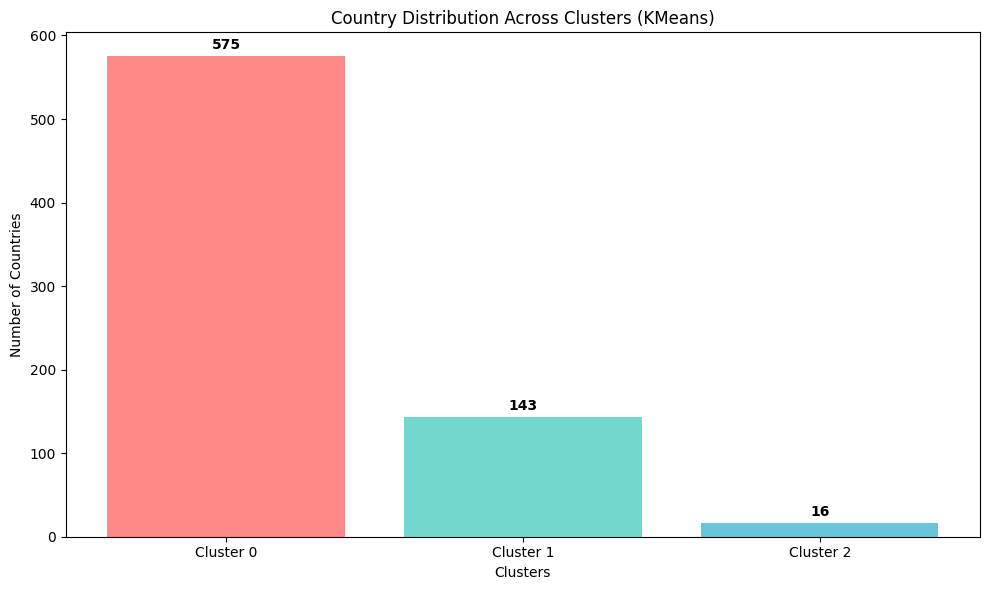

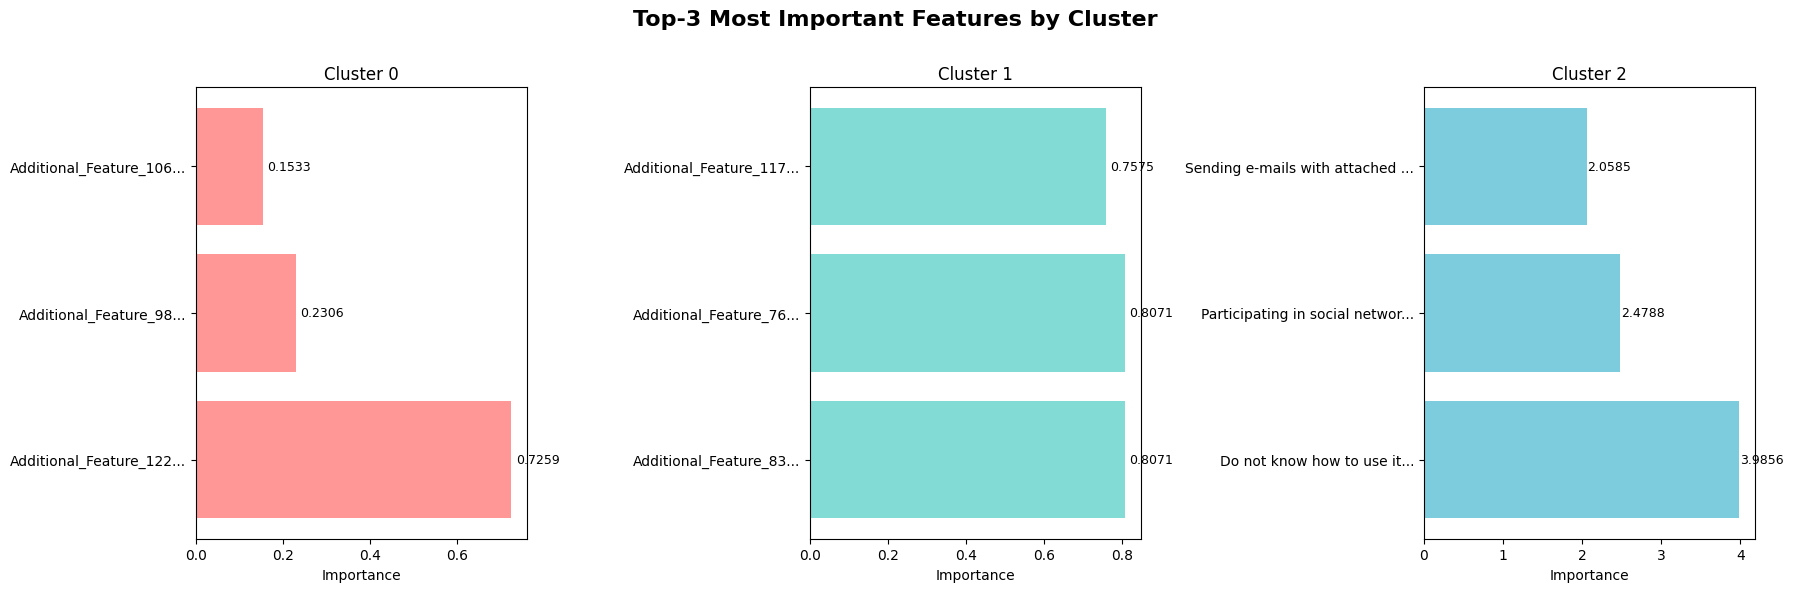

 Analysis completed successfully!


In [15]:
def analyze_feature_importance_per_cluster(data, predictions, indicators, n_clusters=3):
    """Analyze feature importance per cluster using feature importance"""

    # Convert data to numpy
    if isinstance(data.x, torch.Tensor):
        X = data.x.cpu().numpy()
    else:
        X = data.x

    pred_np = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions

    cluster_importances = {}

    for cluster in range(n_clusters):
        cluster_mask = (pred_np == cluster)

        if np.sum(cluster_mask) > 0:
            # Take data only from this cluster
            cluster_data = X[cluster_mask]

            # Calculate mean values and standard deviations
            mean_vals = np.mean(cluster_data, axis=0)
            std_vals = np.std(cluster_data, axis=0)

            # Coefficient of variation as importance measure
            # (high mean + low std = stably important feature)
            with np.errstate(divide='ignore', invalid='ignore'):
                cv = np.where(mean_vals != 0, std_vals / mean_vals, 0)

            # Combined importance: high mean and low CV
            importance_scores = mean_vals * (1 - np.nan_to_num(cv))

            # Sort by importance
            sorted_indices = np.argsort(importance_scores)[::-1]

            top_features = []
            for idx in sorted_indices[:10]:
                if idx < len(indicators):
                    top_features.append({
                        'indicator': indicators[idx],
                        'mean_value': mean_vals[idx],
                        'std_value': std_vals[idx],
                        'importance': importance_scores[idx]
                    })

            cluster_importances[cluster] = top_features

    return cluster_importances

# Create predictions using KMeans if model doesn't work
from sklearn.cluster import KMeans

print(" Creating predictions using KMeans...")
X = data.x.cpu().numpy() if isinstance(data.x, torch.Tensor) else data.x

# Use KMeans for clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
predictions = kmeans.fit_predict(X)

print(f" Predictions created: {predictions.shape}")
print(f" Cluster distribution:")
for i in range(3):
    count = np.sum(predictions == i)
    print(f"   - Cluster {i}: {count} countries")

print("\nAnalyzing feature importance per cluster...")
cluster_importances = analyze_feature_importance_per_cluster(data, predictions, indicators)

print("\n=== CLUSTERING RESULTS ===")
for cluster in range(3):
    print(f"\n--- Cluster {cluster} ---")

    if cluster in cluster_importances and cluster_importances[cluster]:
        print("Top-5 most important indicators:")
        for i, feature in enumerate(cluster_importances[cluster][:5]):
            print(f"  {i+1}. {feature['indicator']}")
            print(f"     Mean: {feature['mean_value']:.4f}, STD: {feature['std_value']:.4f}")
            print(f"     Importance: {feature['importance']:.4f}")
    else:
        print("No data for analysis or empty cluster")

    # Cluster statistics
    cluster_count = np.sum(predictions == cluster)
    print(f"Number of countries in cluster: {cluster_count}")

# Additional visualization
print("\n📈 Creating visualizations...")

# Cluster distribution visualization
plt.figure(figsize=(10, 6))
cluster_counts = [np.sum(predictions == i) for i in range(3)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(range(3), cluster_counts, color=colors, alpha=0.8)

plt.xlabel('Clusters')
plt.ylabel('Number of Countries')
plt.title('Country Distribution Across Clusters (KMeans)')
plt.xticks(range(3), [f'Cluster {i}' for i in range(3)])

# Add values on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    plt.text(bar.get_x() + bar.get_width()/2., count + 5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Top features visualization for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Top-3 Most Important Features by Cluster', fontsize=16, fontweight='bold')

for cluster in range(3):
    ax = axes[cluster]

    if cluster in cluster_importances and cluster_importances[cluster]:
        features = cluster_importances[cluster][:3]
        feature_names = [f['indicator'][:30] + '...' for f in features]
        importances = [f['importance'] for f in features]

        y_pos = np.arange(len(feature_names))
        bars = ax.barh(y_pos, importances, color=colors[cluster], alpha=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names)
        ax.set_xlabel('Importance')
        ax.set_title(f'Cluster {cluster}')

        # Add values on bars
        for bar, importance in zip(bars, importances):
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
                   f'{importance:.4f}', ha='left', va='center', fontsize=9)
    else:
        ax.text(0.5, 0.5, f'No data\nfor cluster {cluster}',
                transform=ax.transAxes, ha='center', va='center', fontsize=12)
        ax.set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

print(" Analysis completed successfully!")

Сode performs advanced cluster analysis using percentile-based feature prominence and GNNExplainer to identify characteristic features for each cluster, then combines both methods to provide comprehensive insights into what defines each country cluster.

In [13]:
import numpy as np
import torch
from torch_geometric.explain import Explainer, GNNExplainer

def improved_cluster_analysis(data, predictions, indicators, n_clusters=3):
    """Improved cluster analysis"""

    if isinstance(data.x, torch.Tensor):
        X = data.x.cpu().numpy()
    else:
        X = data.x

    # Ensure predictions are numpy array
    if isinstance(predictions, torch.Tensor):
        pred_np = predictions.cpu().numpy()
    else:
        pred_np = predictions

    print(f"Overall data shape: {X.shape}")
    print(f"Cluster distribution: {np.bincount(pred_np)}")

    # Improved analysis using percentiles
    cluster_characteristics = {}

    for cluster in range(n_clusters):
        cluster_mask = (pred_np == cluster)
        cluster_count = np.sum(cluster_mask)

        print(f"\n--- Analyzing cluster {cluster} ({cluster_count} countries) ---")

        if cluster_count > 0:
            cluster_data = X[cluster_mask]

            # Calculate median and 75th percentile for each feature in cluster
            cluster_median = np.median(cluster_data, axis=0)
            cluster_75p = np.percentile(cluster_data, 75, axis=0)

            # Find features where 75th percentile is significantly higher than global median
            global_median = np.median(X, axis=0)

            # Calculate feature prominence in cluster
            feature_prominence = cluster_75p - global_median

            # Ignore features with very small absolute values
            meaningful_mask = cluster_75p > 0.01  # significance threshold

            if np.any(meaningful_mask):
                meaningful_prominence = feature_prominence * meaningful_mask

                # Sort by prominence
                sorted_indices = np.argsort(meaningful_prominence)[::-1]

                top_features = []
                for idx in sorted_indices[:8]:  # top-8 features
                    if meaningful_prominence[idx] > 0 and idx < len(indicators):
                        top_features.append({
                            'indicator': indicators[idx],
                            'cluster_median': cluster_median[idx],
                            'cluster_75p': cluster_75p[idx],
                            'global_median': global_median[idx],
                            'prominence': meaningful_prominence[idx]
                        })

                cluster_characteristics[cluster] = top_features
                print(f"Found {len(top_features)} characteristic features")
            else:
                print("All features have very low values")
                cluster_characteristics[cluster] = []
        else:
            cluster_characteristics[cluster] = []

    return cluster_characteristics, pred_np  # return pred_np as well

# Use GNNExplainer to explain several nodes from each cluster
def explain_cluster_representatives(model, data, predictions, indicators, n_nodes=3):
    """Explain representatives from each cluster using GNNExplainer"""

    explainer = Explainer(
        model=model,
        algorithm=GNNExplainer(epochs=100),
        explanation_type='model',
        node_mask_type='attributes',
        edge_mask_type='object',
        model_config=dict(
            mode='multiclass_classification',
            task_level='node',
            return_type='log_probs',
        )
    )

    # Ensure predictions are numpy array
    if isinstance(predictions, torch.Tensor):
        pred_np = predictions.cpu().numpy()
    else:
        pred_np = predictions

    explanations = {}

    for cluster in range(3):
        cluster_mask = (pred_np == cluster)
        cluster_indices = np.where(cluster_mask)[0]

        if len(cluster_indices) > 0:
            # Take several random nodes from cluster
            representative_indices = np.random.choice(cluster_indices,
                                                    size=min(n_nodes, len(cluster_indices)),
                                                    replace=False)

            cluster_explanations = []
            for node_idx in representative_indices:
                try:
                    explanation = explainer(data.x, data.edge_index, index=node_idx)
                    feature_importance = explanation.node_mask.cpu().detach().numpy().flatten()

                    # Top-5 most important features
                    topk = 5
                    topk_indices = feature_importance.argsort()[-topk:][::-1]

                    top_features = []
                    for idx in topk_indices:
                        if idx < len(indicators):
                            top_features.append({
                                'indicator': indicators[idx],
                                'importance': feature_importance[idx],
                                'feature_value': data.x[node_idx, idx].item() if isinstance(data.x, torch.Tensor) else data.x[node_idx, idx]
                            })

                    cluster_explanations.append({
                        'node_idx': node_idx,
                        'top_features': top_features
                    })

                except Exception as e:
                    print(f"Error explaining node {node_idx}: {e}")

            explanations[cluster] = cluster_explanations

    return explanations

print("=== IMPROVED CLUSTER ANALYSIS ===")
improved_results, pred_np = improved_cluster_analysis(data, predictions, indicators)

print("\n=== GNNExplainer EXPLANATIONS ===")
gnn_explanations = explain_cluster_representatives(model, data, pred_np, indicators)

# Display results
print("\n" + "="*50)
print("FINAL CLUSTERING RESULTS")
print("="*50)

for cluster in range(3):
    cluster_count = np.sum(pred_np == cluster)
    print(f"\n--- CLUSTER {cluster} ({cluster_count} countries) ---")

    # Improved analysis results
    if cluster in improved_results and improved_results[cluster]:
        print("\nCHARACTERISTIC FEATURES (by percentiles):")
        for i, feature in enumerate(improved_results[cluster][:5]):
            print(f"  {i+1}. {feature['indicator']}")
            print(f"     Cluster median: {feature['cluster_median']:.4f}")
            print(f"     75th percentile: {feature['cluster_75p']:.4f}")
            print(f"     Global median: {feature['global_median']:.4f}")

    # GNNExplainer results
    if cluster in gnn_explanations and gnn_explanations[cluster]:
        print(f"\nGNNExplainer analysis (using {len(gnn_explanations[cluster])} country examples):")
        for i, explanation in enumerate(gnn_explanations[cluster][:2]):  # show 2 examples
            print(f"  Country {explanation['node_idx']}:")
            for feat in explanation['top_features'][:3]:  # top-3 features
                print(f"    - {feat['indicator']} (importance: {feat['importance']:.4f}, value: {feat['feature_value']:.4f})")

    if (cluster not in improved_results or not improved_results[cluster]) and \
       (cluster not in gnn_explanations or not gnn_explanations[cluster]):
        print("\nCould not identify characteristic features for this cluster")

=== IMPROVED CLUSTER ANALYSIS ===
Overall data shape: (734, 123)
Cluster distribution: [575 143  16]

--- Analyzing cluster 0 (575 countries) ---
Found 8 characteristic features

--- Analyzing cluster 1 (143 countries) ---
Found 8 characteristic features

--- Analyzing cluster 2 (16 countries) ---
Found 8 characteristic features

=== GNNExplainer EXPLANATIONS ===

FINAL CLUSTERING RESULTS

--- CLUSTER 0 (575 countries) ---

CHARACTERISTIC FEATURES (by percentiles):
  1. Doing an online course
     Cluster median: -0.8320
     75th percentile: 0.9545
     Global median: -0.8320
  2. Software excluding games and computer software packages
     Cluster median: -0.7771
     75th percentile: 0.8768
     Global median: -0.7771
  3. Desktop computer
     Cluster median: -0.8208
     75th percentile: 0.7342
     Global median: -0.8208
  4. Individuals with basic skills in communication and collaboration
     Cluster median: -0.8942
     75th percentile: 0.9413
     Global median: -0.5145
  5. 